<div align="center">
    <h1> <b>HACKATHON MACH</b></h1>
    <h1> <b>PROYECTO DE EDUCACIÓN FINANCIERA PARA CLIENTES MACH</b></h1><br>
</div>
<div>

</div>

# 1. ENUNCIADO DEL PROBLEMA Y CASO PRÁCTICO.

## 1.1 Entendimiento del Negocio.

#### MACH es una cuenta digital que busca ofrecer soluciones financieras justas y de calidad para todo Chile. La experiencia MACH está basada en su App y contiene varios productos digitales que se distinguen por su simplicidad, apertura, innovación y gratuidad. Se destacan los productos de la tarjeta virtual prepago, tarjeta física, pago de cuentas y recargas, pagos entre personas con número de teléfono (MachPAY), pago con QR, recarga BIP, cuenta futuro (cuenta de ahorro con interés), pago en cuotas, programa de beneficios Bci+ con cashback, cuenta para menores de edad (tuMACH). Actualmente cuenta con más de 3.6 millones de clientes, principalmente en grupos jóvenes, y tiene el desafío de ir aumentando su oferta de productos y experiencias como banco digital. Una de las mayores necesidades declaradas por los clientes es la educación financiera: cómo tomar mejores decisiones en torno al dinero y tomar el control de las finanzas, acompañado de una experiencia fresca y lúdica.

## 1.2 Objetivo del Proyecto.

#### Desafío: Generar contenidos personalizados para cada cliente individual, basados en su comportamiento financiero e historial de compras, que permita mejorar sus finanzas personales. No existe una solución preconcebida, se valorará la capacidad de generar una buena experiencia con contenido personalizado, que fortalezca el engagement del cliente con MACH. Se valorará el uso de servicios externos que permitan enriquecer el contenido.

## 1.3 Características del Cliente.

#### Se disponibiliza un archivo csv con información de 200 clientes anónimos (user_id de 1 a 200) y que contiene el detalle de sus movimientos en dos tipos de bancos, banco 1 y banco.
#### La información será la siguiente
#### - Listado de ingresos y egresos en su cuenta de usuario, categorizados y con información de la glosa de los últimos 6 meses o más.
#### - Listado de compras con tarjeta de débito y crédito, con rubro y nombre de fantasía asignado.
#### Cada cliente contiene información que puede variar en cantidad de registros, dado que el uso de cada cliente es variable. Los datos de compras con tarjeta de débito pueden estar contenidos en los registros de ingresos y egresos con la categoría “pago con tarjeta de débito”. Los datos de las compras con tarjeta de crédito no están contenidos en los registros de ingresos y egresos, dado que lo que ahí se muestra, eventualmente, será el pago de la tarjeta de crédito que correspondiera.

# 2. Importar y leer datos.

## 2.1 Importe de librerías.

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## 2.2 Lectura de datos.

In [148]:
# Dataset 1
listado_compras = pd.read_csv("gastos_tarjeta_train.csv")
pd.set_option('display.max_columns',100)
listado_compras.head()

,user_id,fecha,description,amount,rubro_nivel1,nombre_fantasia,tipo_tarjeta,banco
0,143,2022-03-16,DULCE TENTACION SANTIAGO,-2200,Alimentación,DULCE TENTACION,TC,1
1,48,2022-09-20,COMPRA TARJETA DEBITO,-5420,Servicios,SERVIPAG,TD,1
2,28,2022-06-06,PAGO:PANETTI,-5300,Restaurantes,PANETTI,TD,1
3,87,2022-10-03,COMPRA REDELCOM 413 CL,-550,Otros,COMPRA REDELCOM 413 CL,TD,1
4,141,2022-12-07,COMPRA REDELCO*SUPE CL,-3340,Otros,REDELCO*EDUARDO ANDRES,TD,1


In [106]:
# Dataset 2
listado_ingresos_egresos = pd.read_csv("ingresos_egresos_train.csv")
listado_ingresos_egresos.head()

,user_id,fecha,tipo,categoria,amount,banco,description
0,74,2023-03-01,CARGO,pago con tarjeta de débito,-119420,1,MEGASALUD CAL DEN
1,74,2022-09-15,ABONO,abono remuneraciones,305000,1,abono remuneraciones
2,21,2022-07-07,CARGO,pago con tarjeta de débito,-1500,1,COMPRA COMIDA RAPIDA
3,13,2022-03-18,CARGO,giros en efectivo,-6000,1,giros en efectivo
4,79,2022-12-26,ABONO,transferencias,1450,1,transferencias


## 2.3 Leyenda de los dataset.

### 2.3.1 Listado de compras.

In [107]:
listado_compras.columns

Index(['user_id', 'fecha', 'description', 'amount', 'rubro_nivel1',
       'nombre_fantasia', 'tipo_tarjeta', 'banco'],
      dtype='object')

#### user_id: usuario
#### fecha: fecha de la compra
#### description: descripción de la compra
#### amount: importe de la transacción
#### rubro_nivel1: rubro del comercio donde se hizo la compra
#### nombre_fantasia: nombre del comercio donde se hizo la compra
#### tipo_tarjeta: tipo tajeta que puede ser TD  o TC (tarjeta débito o crédito)
#### banco: tipo de banco que puede ser 1 o 2.

### 2.3.2 Listado de ingresos y egresos.

In [108]:
listado_ingresos_egresos.columns

Index(['user_id', 'fecha', 'tipo', 'categoria', 'amount', 'banco',
       'description'],
      dtype='object')

#### user_id: usuario
#### fecha: fecha de la compra
#### tipo: tipo de ingreso, puede ser cargo o abono en cuenta
#### categoría: categoría del movimiento (transferencia, movimiento, giro, etc)
#### amount: importe del abono o cargo.
#### banco: tipo de banco que puede ser 1 o 2.
#### description: descripción del movimiento

In [109]:
listado_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77418 entries, 0 to 77417
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          77418 non-null  int64 
 1   fecha            77418 non-null  object
 2   description      77418 non-null  object
 3   amount           77418 non-null  int64 
 4   rubro_nivel1     77418 non-null  object
 5   nombre_fantasia  77418 non-null  object
 6   tipo_tarjeta     77418 non-null  object
 7   banco            77418 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.7+ MB


### Tenemos como objetos a las fechas, la descripción, el rubro, nombre de la tienda y el tipo tarjeta. User, importe y tipo banco son numéricos.

In [110]:
listado_ingresos_egresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170142 entries, 0 to 170141
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      170142 non-null  int64 
 1   fecha        170142 non-null  object
 2   tipo         170142 non-null  object
 3   categoria    170142 non-null  object
 4   amount       170142 non-null  int64 
 5   banco        170142 non-null  int64 
 6   description  170088 non-null  object
dtypes: int64(3), object(4)
memory usage: 9.1+ MB


### Tenemos como objetos a fecha, tipo de ingreso (abono o cargo), a categoría y descripción. Los demás son enteros.

## 2.4 Descripción estadística de los dataset.

In [111]:
listado_compras.describe()

,user_id,amount,banco
count,77418.000000,7.741800e+04,77418.000000
mean,101.556744,-1.518804e+04,1.132876
std,59.272433,6.726333e+04,0.339443
min,1.000000,-6.768725e+06,1.000000
25%,50.000000,-1.430000e+04,1.000000
50%,100.000000,-6.220000e+03,1.000000
75%,153.000000,-3.000000e+03,1.000000
max,200.000000,-3.000000e+00,2.000000


### Primeras Conclusiones.
#### 1.- El promedio de los gastos por transacción es de 15188 pesos. Esta información no es relevante, ya que existe mucha variabilidad.
#### 2.- El gasto máximo es de 6.7 mill de pesos.
#### 3.- Al menos el 75% de las personas realiza las transacciones con el banco 1. 

In [112]:
listado_ingresos_egresos.describe()

,user_id,amount,banco
count,170142.000000,1.701420e+05,170142.000000
mean,101.576160,-2.301594e+02,1.142757
std,58.614702,3.806695e+05,0.349826
min,1.000000,-5.101182e+07,1.000000
25%,50.000000,-1.482000e+04,1.000000
50%,101.000000,-4.100000e+03,1.000000
75%,153.000000,1.000000e+00,1.000000
max,200.000000,5.101182e+07,2.000000


### Primeras Conclusiones.
#### 1.- El abono más alto es igual al cargo más alto (51 mill de pesos).
#### 2.- Al menos el 75% de las personas realiza las transacciones con el banco 1. 

# 3. VISUALIZACIÓN DE LOS DATASET.

## 3.1 Revisión e imputación de nulos.

### 3.1.1 Hallar nulos.

In [113]:
listado_compras.isna().sum().sort_values(ascending = False)

user_id            0
fecha              0
description        0
amount             0
rubro_nivel1       0
nombre_fantasia    0
tipo_tarjeta       0
banco              0
dtype: int64

In [115]:
listado_ingresos_egresos.isna().sum().sort_values(ascending = False)

description    54
user_id         0
fecha           0
tipo            0
categoria       0
amount          0
banco           0
dtype: int64

### 3.1.2 Imputar nulos.

In [116]:
# Revisamos las respuestas de la variable description, que es donde se encuentran los nulos.
listado_ingresos_egresos['description'].value_counts()

transferencias                        74158
COM TRANSF OTRO BANCO POR INTERNET     3538
giros en efectivo                      1120
COMPRA TARJETA DEBITO                  1013
pXp_cuenta_futuro                       957
                                      ...  
REDCOMPRA REDELCO VENTAS RE               1
PAGO:REST BAR NACIONAL                    1
PAGO:LA RIOJA                             1
GOOGLE *CLOUD XQQZPS                      1
COMPRA UNO SALUD PU CL                    1
Name: description, Length: 17653, dtype: int64

In [117]:
# Para no perder las 54 filas de datos donde description es null, imputaremos estos nulos por el dato
# que más se repite. 
listado_ingresos_egresos.loc[(listado_ingresos_egresos['description'].isnull() == True), 'description'] = 'transferencias'

In [118]:
# Revisamos.
listado_ingresos_egresos.isna().sum().sort_values(ascending = False)

user_id        0
fecha          0
tipo           0
categoria      0
amount         0
banco          0
description    0
dtype: int64

In [119]:
# Revisamos si transferencias tiene 54 transferencias más.
listado_ingresos_egresos['description'].value_counts()

transferencias                        74212
COM TRANSF OTRO BANCO POR INTERNET     3538
giros en efectivo                      1120
COMPRA TARJETA DEBITO                  1013
pXp_cuenta_futuro                       957
                                      ...  
REDCOMPRA REDELCO VENTAS RE               1
PAGO:REST BAR NACIONAL                    1
PAGO:LA RIOJA                             1
GOOGLE *CLOUD XQQZPS                      1
COMPRA UNO SALUD PU CL                    1
Name: description, Length: 17653, dtype: int64

## 3.2 Visualizaciones personalizadas del cliente.

### 3.2.1 Función para mostrar información por cliente.

In [120]:
def info_cliente(user_id, df): # id usuario y dataset 
    df = df[df['user_id'] == user_id] # filtrar del dataset original, sólo la información del usuario según su ID
    df = df.sort_values('fecha') # ordena ascendentemente mediante el campo 'fecha'
    return df

### 3.2.2. Ingresar ID cliente.

In [121]:
user_id = int(input('Ingrese Id cliente: '))

Ingrese Id cliente:  2


### 3.2.3. Llamar a la función para mostrar el dataset "listado de compras por cliente".

In [122]:
compra_cliente = info_cliente(user_id,listado_compras)
compra_cliente

,user_id,fecha,description,amount,rubro_nivel1,nombre_fantasia,tipo_tarjeta,banco
12378,2,2021-12-20,COMPRA SUMUPAGRICOL CL,-3650,Otros,COMPRA SUMUPAGRICOL CL,TD,1
33410,2,2021-12-20,COMPRA MILEN MILOM CL,-6800,Otros,MILEN MILOM MOY PLAZA,TD,1
75852,2,2021-12-20,COMPRA SUMUPAGRICOL CL,-3350,Otros,COMPRA SUMUPAGRICOL CL,TD,1
51879,2,2021-12-21,COMPRA SUMUPAGRICOL CL,-2800,Otros,COMPRA SUMUPAGRICOL CL,TD,1
68366,2,2021-12-23,COMPRA SODIMAC ANTO CL,-6670,Ferretería Y Construcción,SODIMAC,TD,1
...,...,...,...,...,...,...,...,...
27261,2,2023-01-03,COMPRA CRUZ VERDE L CL,-4602,Farmacias,CRUZ VERDE,TD,1
69214,2,2023-01-03,COMPRA BOTILLERIA R CL,-6300,Alimentación,BOTILLERIA SANTO REMEDIO,TD,1
33525,2,2023-01-04,COMPRA BOTILLERIA R CL,-3660,Alimentación,BOTILLERIA SANTO REMEDIO,TD,1
8984,2,2023-01-09,MERPAGO*NIVEL6,-4989,Servicios Online,MERCADOPAGO NIVEL6,TD,2


### 3.2.4. Transformar "amount" a positivo.

In [123]:
compra_cliente['amount'] = compra_cliente['amount'].apply(lambda x: x*(-1) if x < 0 else x)
compra_cliente

,user_id,fecha,description,amount,rubro_nivel1,nombre_fantasia,tipo_tarjeta,banco
12378,2,2021-12-20,COMPRA SUMUPAGRICOL CL,3650,Otros,COMPRA SUMUPAGRICOL CL,TD,1
33410,2,2021-12-20,COMPRA MILEN MILOM CL,6800,Otros,MILEN MILOM MOY PLAZA,TD,1
75852,2,2021-12-20,COMPRA SUMUPAGRICOL CL,3350,Otros,COMPRA SUMUPAGRICOL CL,TD,1
51879,2,2021-12-21,COMPRA SUMUPAGRICOL CL,2800,Otros,COMPRA SUMUPAGRICOL CL,TD,1
68366,2,2021-12-23,COMPRA SODIMAC ANTO CL,6670,Ferretería Y Construcción,SODIMAC,TD,1
...,...,...,...,...,...,...,...,...
27261,2,2023-01-03,COMPRA CRUZ VERDE L CL,4602,Farmacias,CRUZ VERDE,TD,1
69214,2,2023-01-03,COMPRA BOTILLERIA R CL,6300,Alimentación,BOTILLERIA SANTO REMEDIO,TD,1
33525,2,2023-01-04,COMPRA BOTILLERIA R CL,3660,Alimentación,BOTILLERIA SANTO REMEDIO,TD,1
8984,2,2023-01-09,MERPAGO*NIVEL6,4989,Servicios Online,MERCADOPAGO NIVEL6,TD,2


### 3.2.5 Crear Csv para subir a la base de datos.

In [124]:
compra_cliente.to_csv('compras_testing.csv')

## Total compras de los últimos años.

In [125]:
compra_cliente['amount'].sum()

4161313

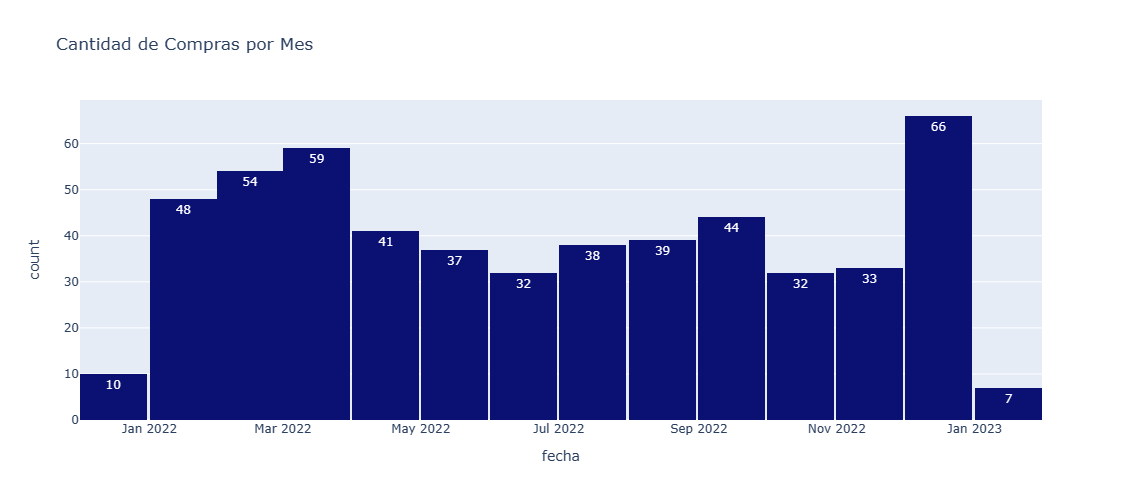

In [126]:
px.histogram(compra_cliente, x='fecha', text_auto=True,
             title='Cantidad de Compras por Mes',
             width=1100, height=500, color_discrete_sequence=['#0A1172'])

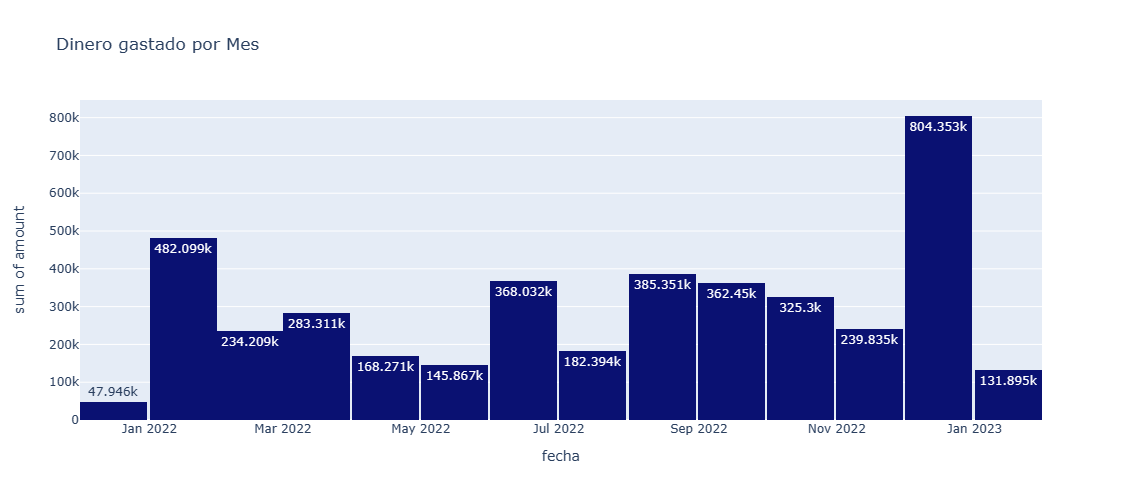

In [127]:
px.histogram(compra_cliente, x='fecha', y='amount', text_auto=True,
             title='Dinero gastado por Mes',
             width=1100, height=500, color_discrete_sequence=['#0A1172'])

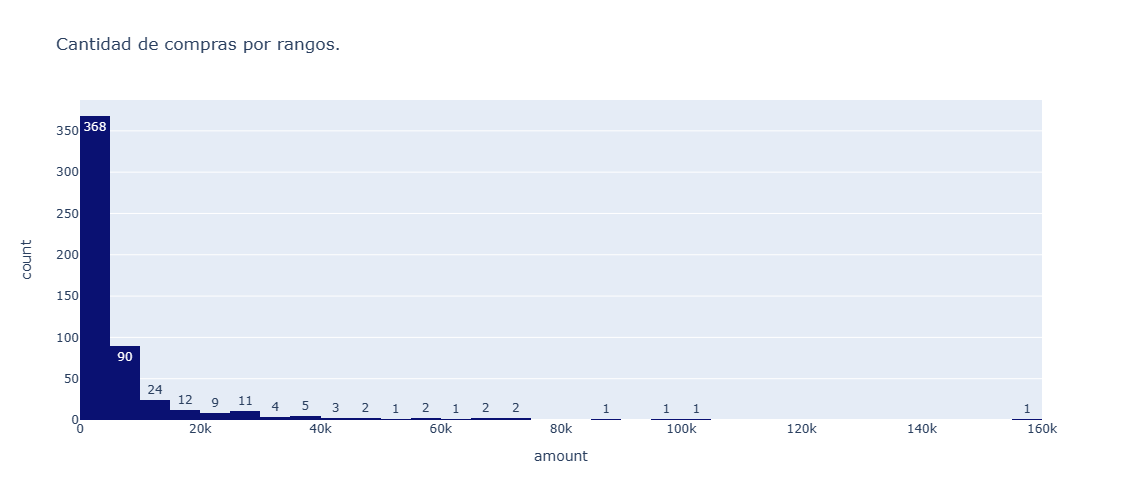

In [128]:
px.histogram(compra_cliente, x='amount', text_auto=True,
             title='Cantidad de compras por rangos.',
             width=1100, height=500, color_discrete_sequence=['#0A1172'])

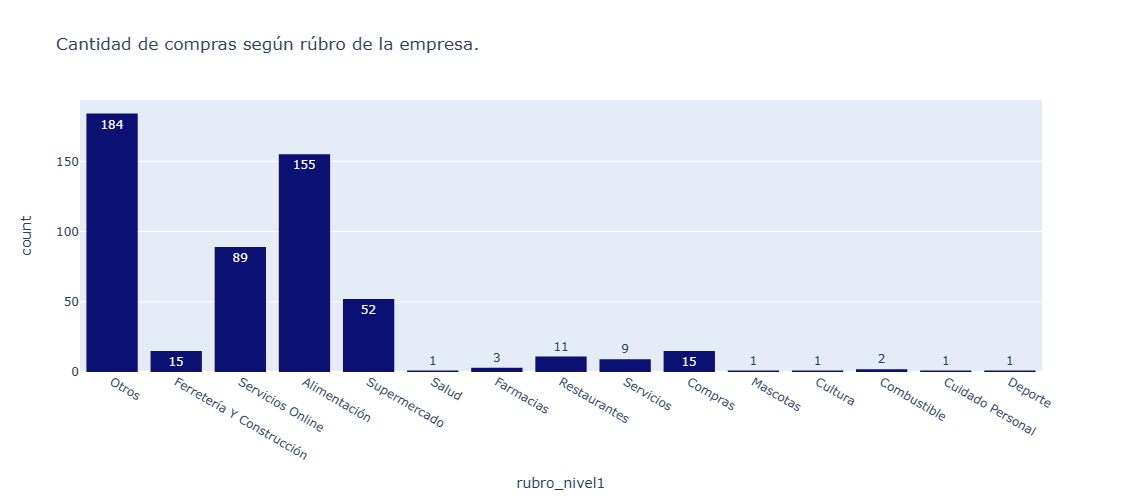

In [129]:
px.histogram(compra_cliente, x='rubro_nivel1', text_auto=True,
             title='Cantidad de compras según rúbro de la empresa.',
             width=1100, height=500, color_discrete_sequence=['#0A1172'])

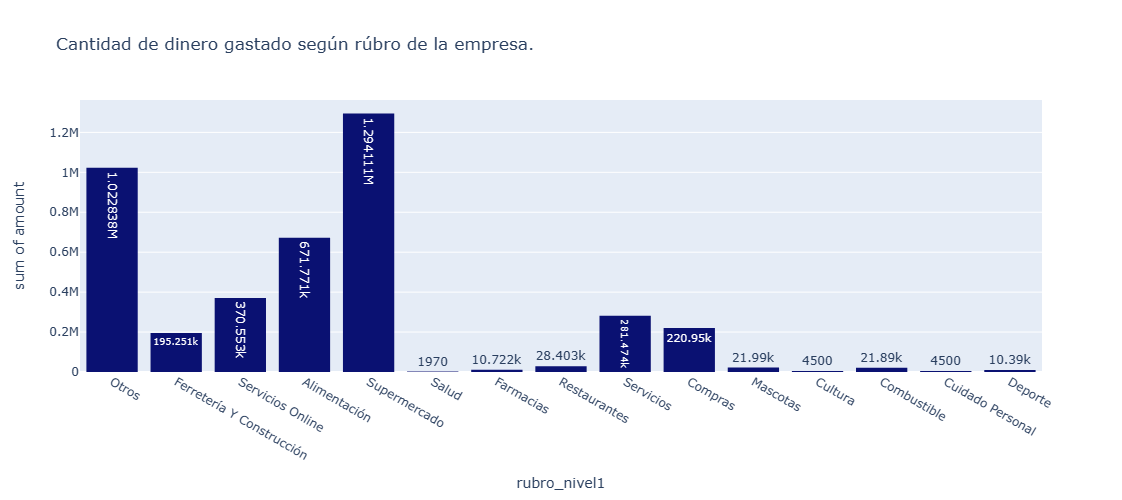

In [130]:
px.histogram(compra_cliente, x='rubro_nivel1', y='amount', text_auto=True,
             title='Cantidad de dinero gastado según rúbro de la empresa.',
             width=1100, height=500, color_discrete_sequence=['#0A1172'])

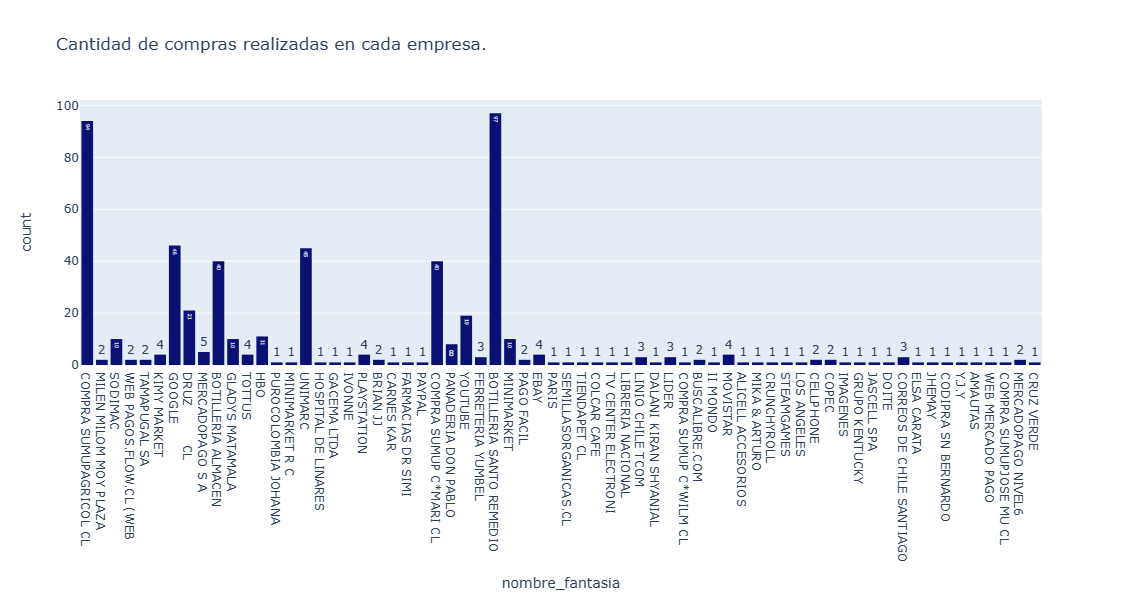

In [131]:
px.histogram(compra_cliente, x='nombre_fantasia', text_auto=True,
             title='Cantidad de compras realizadas en cada empresa.',
             width=1100, height=600, color_discrete_sequence=['#0A1172'])

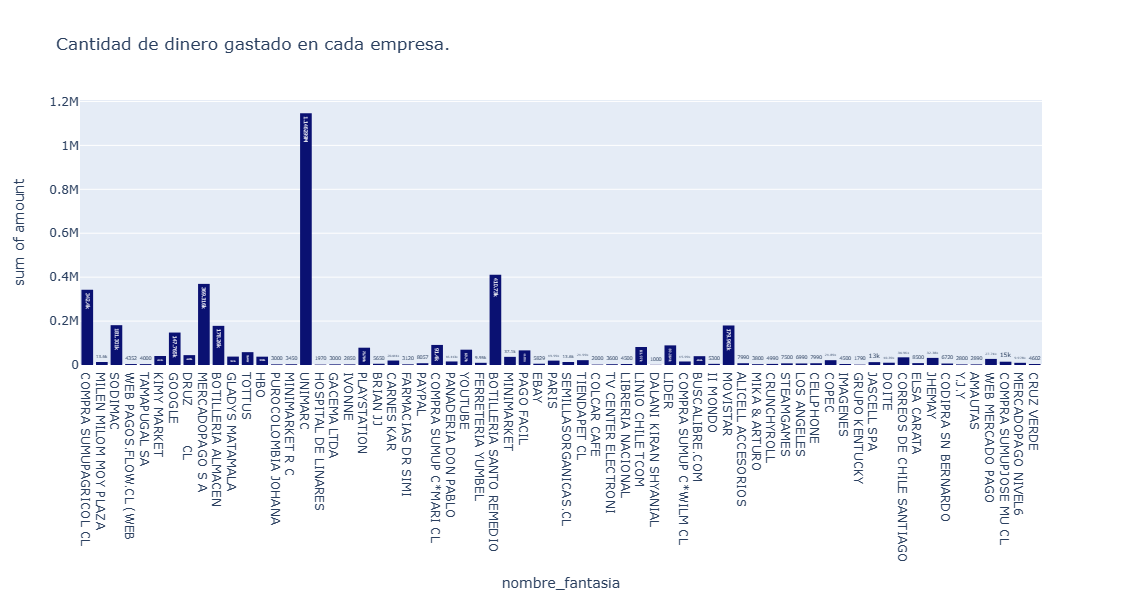

In [132]:
px.histogram(compra_cliente, x='nombre_fantasia', y ='amount', text_auto=True,
             title='Cantidad de dinero gastado en cada empresa.',
             width=1100, height=600, color_discrete_sequence=['#0A1172'])

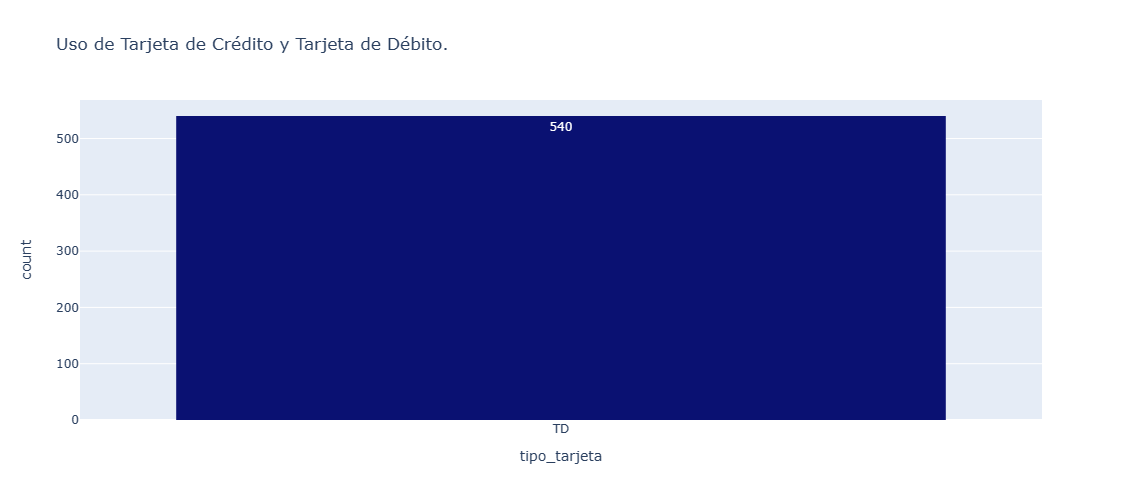

In [133]:
px.histogram(compra_cliente, x='tipo_tarjeta', text_auto=True,
             title='Uso de Tarjeta de Crédito y Tarjeta de Débito.',
             width=1100, height=500, color_discrete_sequence=['#0A1172'])

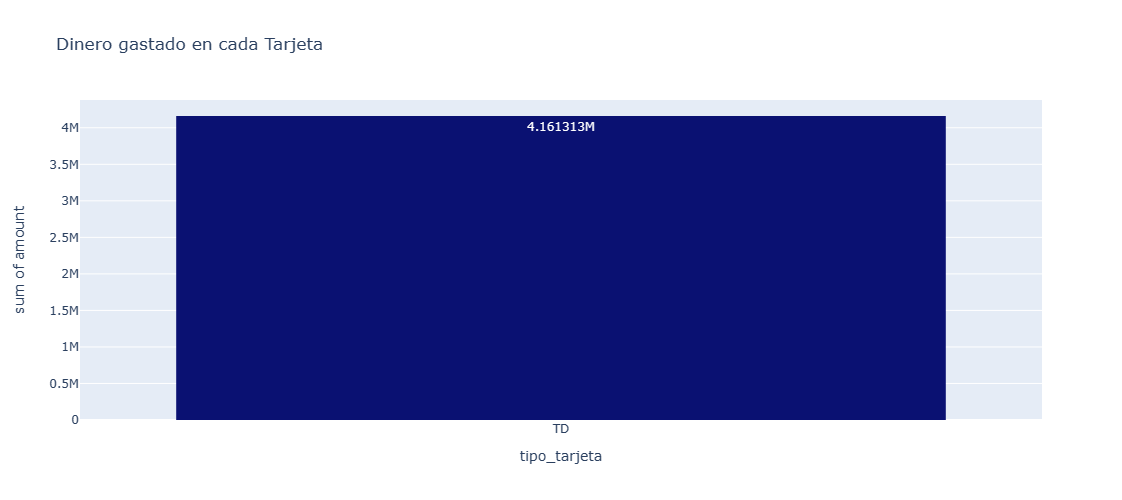

In [134]:
px.histogram(compra_cliente, x='tipo_tarjeta', y='amount', text_auto=True,
             title='Dinero gastado en cada Tarjeta',
             width=1100, height=500, color_discrete_sequence=['#0A1172'])

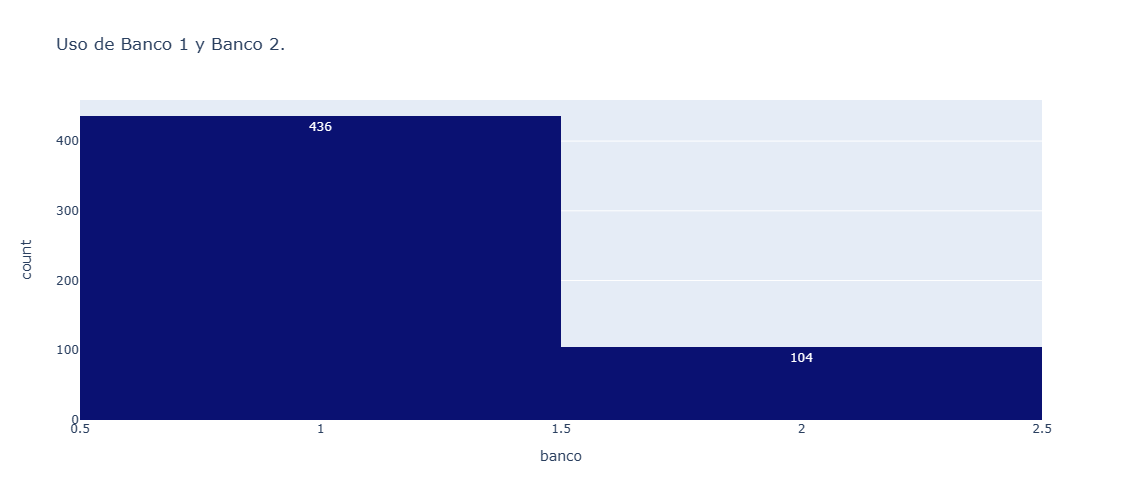

In [135]:
px.histogram(compra_cliente, x='banco', text_auto=True,
             title='Uso de Banco 1 y Banco 2.',
             width=1100, height=500, color_discrete_sequence=['#0A1172'])

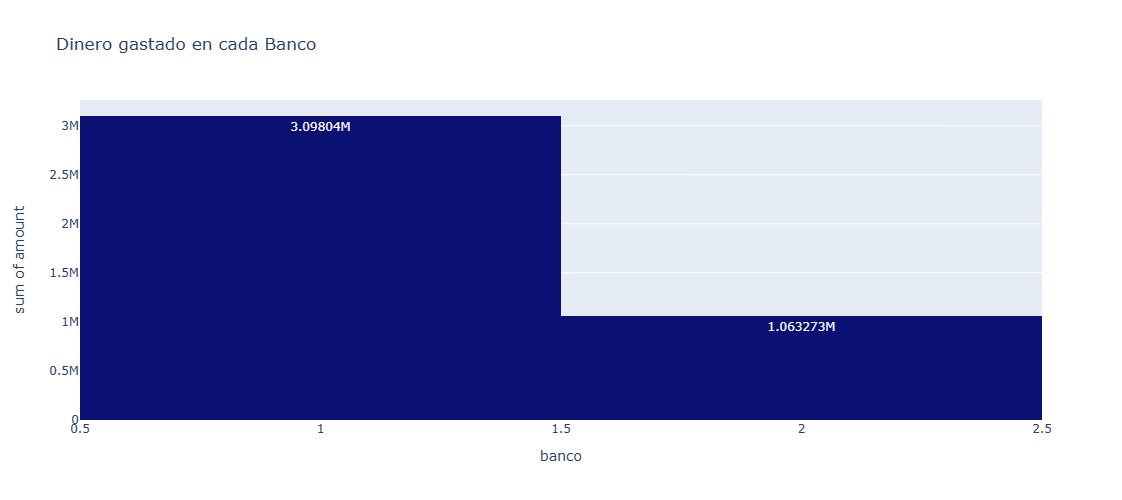

In [136]:
px.histogram(compra_cliente, x='banco', y='amount', text_auto=True,
             title='Dinero gastado en cada Banco',
             width=1100, height=500, color_discrete_sequence=['#0A1172'])